In [3]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, BatchNormalization, Activation, Flatten, Dropout
from tensorflow import losses, optimizers
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Model
from tensorflow.keras.models import *
import numpy as np
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
import random
import os
import cv2
from numpy import asarray
%matplotlib inline

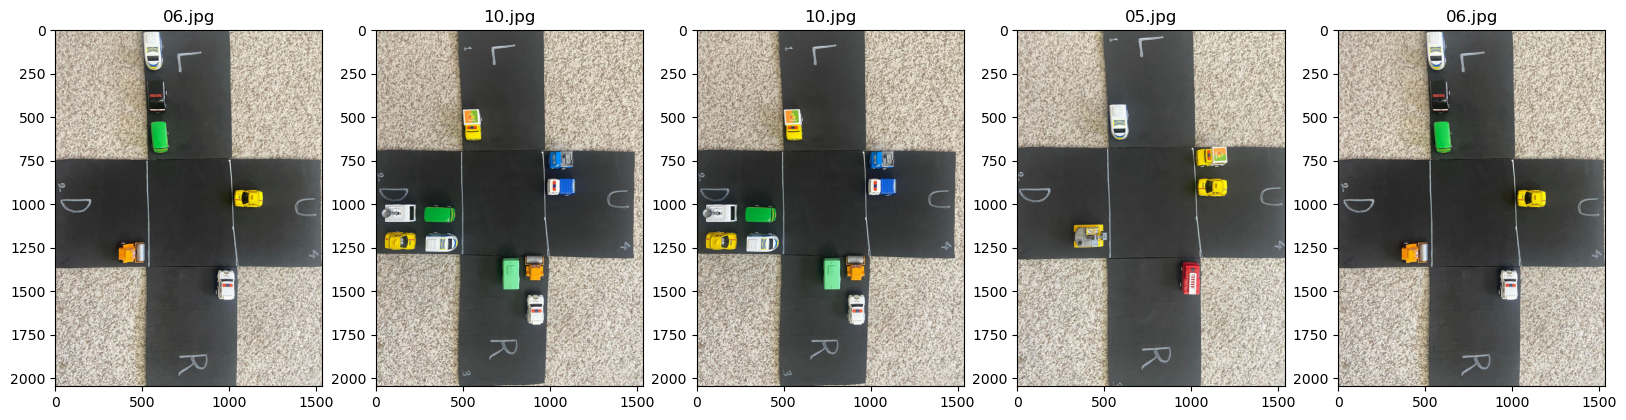

In [30]:
plt.figure(figsize=(20,20))
img_folder=r'C:\\Users\\Dhruba\\codes\\Project_IoT\\traffic_images\\Train'
for i in range(5):
    file = random.choice(os.listdir(img_folder))
    image_path= os.path.join(img_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [34]:
IMG_WIDTH=80
IMG_HEIGHT=80
img_folder=r'C:\\Users\\Dhruba\\codes\\Project_IoT\\traffic_images\\Train'
#test_folder=r'C:\\Users\\Dhruba\\codes\\Project_IoT\\traffic_images\\Test'
test_folder = r'C:\\Users\\Dhruba\\IoTProject\\IoT\\images'

In [28]:
def create_dataset(img_folder):
   
    img_data_array=[]
   
    for file in os.listdir(os.path.join(img_folder)):

        image_path= os.path.join(img_folder,  file)
        image= cv2.imread(image_path, cv2.COLOR_BGR2RGB)
        image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
        image=np.array(image)
        image = image.astype('float32')
        image /= 255 
        img_data_array.append(image)
    return img_data_array

In [174]:
# extract the image array and class name
img_data = create_dataset(img_folder)
X_train = np.array(img_data)

(52, 80, 80, 3)

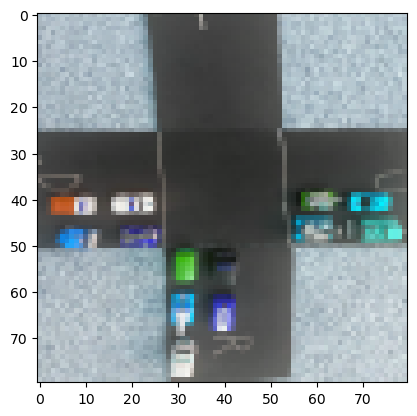

In [178]:
plt.imshow(X_train[51])
X_train.shape

In [176]:
y_train = np.array([[2, 2, 1, 1], [2, 2, 3, 3], [2, 2, 1, 3], [1, 2, 1, 2], [1, 1, 1, 2], [3, 1, 1, 1], [2, 1, 1, 3],
                    [1, 1, 1, 2], [2, 2, 3, 1], [1, 4, 3, 2], [2, 1, 1, 1], [2, 1, 1, 1], [1, 1, 1, 1], [1, 0, 1, 1],
                    [1, 0, 1, 0], [2, 0, 0, 0], [0, 0, 0, 0], [0, 0, 1, 0], [0, 0, 1, 2], [0, 1, 1, 2], [2, 0, 1, 0],
                    [2, 0, 1, 1], [1, 1, 2, 2], [1, 0, 2, 1], [1, 1, 1, 1], [2, 3, 3, 3], [3, 4, 2, 3], [4, 3, 2, 4],
                    [4, 4, 0, 5], [1, 3, 0, 5], [1, 2, 0, 5], [0, 0, 6, 2], [1, 3, 0, 4], [6, 1, 0, 1], [6, 0, 2, 0],
                    [8, 0, 1, 4], [4, 3, 3, 3], [4, 4, 2, 3], [4, 3, 4, 2], [6, 0, 4, 3], [5, 0, 4, 4], [4, 2, 4, 3],
                    [4, 2, 4, 3], [2, 5, 3, 3], [1, 4, 4, 4], [0, 0, 4, 0], [2, 0, 4, 0], [2, 0, 4, 2], [0, 2, 3, 3],
                    [3, 3, 2, 0], [3, 4, 3, 3], [0, 4, 5, 4]])
y_train.shape

(52, 4)

In [29]:
img_data = create_dataset(test_folder)
X_test = np.array(img_data)
#y_test = np.array([[1, 0, 1, 1], [1, 0, 3, 0], [3, 2, 3, 2], [2, 2, 3, 1], [0, 2, 3, 2]])

error: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-6sxsq0tp\opencv\modules\imgproc\src\resize.cpp:3929: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [190]:
## Our Deep Neural Network ##
def CstmNet(input_shape=(80, 80, 3)):

    X1_input = Input(input_shape)
    
############ First input branch ######################

    X1 = Conv2D(32, 3, strides=1, padding="same")(X1_input)
    X1 = BatchNormalization(axis=-1)(X1)
    X1 = Activation('relu')(X1)
    X1 = MaxPooling2D(3, strides=2)(X1)     
    

    X1 = Conv2D(32, 3, strides=1, padding="same")(X1)
    X1 = BatchNormalization(axis=-1)(X1)
    X1 = Activation('relu')(X1)
    X1 = MaxPooling2D(3, strides=2)(X1)    
      
    X1 = Conv2D(16, 3, strides=1, padding="same")(X1)
    X1 = BatchNormalization(axis=-1)(X1)
    X1 = Activation('relu')(X1)
    X1 = MaxPooling2D(2, strides=2)(X1)    
        

    #X = AveragePooling2D()(X1)
    X = Flatten()(X1)
    
############ Final Layer ######################
    
    X = Dropout(0.1)(X)
    X = Dense(64, activation='relu')(X)
    #X = Dropout(0.1)(X)
    output = Dense(4)(X) 
    model = Model(inputs=X1_input, outputs=output, name='CstmNet_DDD')
    
    return model

model = CstmNet(input_shape=(80, 80, 3))
model.summary()

Model: "CstmNet_DDD"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 80, 80, 3)]       0         
                                                                 
 conv2d_40 (Conv2D)          (None, 80, 80, 32)        896       
                                                                 
 batch_normalization_39 (Bat  (None, 80, 80, 32)       128       
 chNormalization)                                                
                                                                 
 activation_39 (Activation)  (None, 80, 80, 32)        0         
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 39, 39, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 39, 39, 32)        

In [233]:
# fit the model on all data

LR = 0.0001
optim = optimizers.Adam(learning_rate=LR)

model.compile(optimizer=optim, loss = 'mae', metrics=['accuracy'])

filepath = 'traffic.ep{epoch:02d}-acc{val_accuracy:.3f}.hdf5'
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='val_accuracy',
                             verbose=1, 
                             save_best_only=True,
                             mode='max')
callbacks = [checkpoint]

result = model.fit(x=X_train,
                    y=y_train,
                    batch_size = 25,
                    epochs = 100,
                    verbose=1,
                    validation_data=(X_test, y_test),
                    callbacks=callbacks,
                    shuffle=True)

Epoch 1/100
1/3 [=========>....................] - ETA: 1s - loss: 0.2682 - accuracy: 0.6400
Epoch 1: val_accuracy improved from -inf to 0.80000, saving model to traffic.ep01-acc0.800.hdf5
3/3 [==============================] - 1s 154ms/step - loss: 0.2806 - accuracy: 0.7885 - val_loss: 0.1709 - val_accuracy: 0.8000
Epoch 2/100
1/3 [=========>....................] - ETA: 0s - loss: 0.3010 - accuracy: 0.8400
Epoch 2: val_accuracy did not improve from 0.80000
3/3 [==============================] - 0s 46ms/step - loss: 0.3217 - accuracy: 0.8269 - val_loss: 0.1570 - val_accuracy: 0.8000
Epoch 3/100
1/3 [=========>....................] - ETA: 0s - loss: 0.2906 - accuracy: 0.8400
Epoch 3: val_accuracy did not improve from 0.80000
3/3 [==============================] - 0s 36ms/step - loss: 0.2887 - accuracy: 0.8654 - val_loss: 0.2055 - val_accuracy: 0.8000
Epoch 4/100
1/3 [=========>....................] - ETA: 0s - loss: 0.2954 - accuracy: 0.7200
Epoch 4: val_accuracy did not improve from 0.

Epoch 31/100
1/3 [=========>....................] - ETA: 0s - loss: 0.2419 - accuracy: 0.7600
Epoch 31: val_accuracy did not improve from 0.80000
3/3 [==============================] - 0s 47ms/step - loss: 0.2495 - accuracy: 0.7885 - val_loss: 0.2921 - val_accuracy: 0.8000
Epoch 32/100
1/3 [=========>....................] - ETA: 0s - loss: 0.2674 - accuracy: 0.7600
Epoch 32: val_accuracy did not improve from 0.80000
3/3 [==============================] - 0s 48ms/step - loss: 0.2855 - accuracy: 0.7885 - val_loss: 0.2607 - val_accuracy: 0.8000
Epoch 33/100
1/3 [=========>....................] - ETA: 0s - loss: 0.2821 - accuracy: 0.7200
Epoch 33: val_accuracy did not improve from 0.80000
3/3 [==============================] - 0s 54ms/step - loss: 0.2772 - accuracy: 0.6923 - val_loss: 0.2533 - val_accuracy: 0.8000
Epoch 34/100
1/3 [=========>....................] - ETA: 0s - loss: 0.2667 - accuracy: 0.8800
Epoch 34: val_accuracy did not improve from 0.80000
3/3 [===========================

Epoch 61/100
1/3 [=========>....................] - ETA: 0s - loss: 0.3352 - accuracy: 0.8400
Epoch 61: val_accuracy did not improve from 0.80000
3/3 [==============================] - 0s 44ms/step - loss: 0.3083 - accuracy: 0.7885 - val_loss: 0.3379 - val_accuracy: 0.8000
Epoch 62/100
1/3 [=========>....................] - ETA: 0s - loss: 0.2804 - accuracy: 0.8000
Epoch 62: val_accuracy did not improve from 0.80000
3/3 [==============================] - 0s 48ms/step - loss: 0.2665 - accuracy: 0.7500 - val_loss: 0.3154 - val_accuracy: 0.8000
Epoch 63/100
1/3 [=========>....................] - ETA: 0s - loss: 0.2665 - accuracy: 0.8400
Epoch 63: val_accuracy did not improve from 0.80000
3/3 [==============================] - 0s 48ms/step - loss: 0.2711 - accuracy: 0.8654 - val_loss: 0.2530 - val_accuracy: 0.8000
Epoch 64/100
1/3 [=========>....................] - ETA: 0s - loss: 0.2584 - accuracy: 0.7600
Epoch 64: val_accuracy did not improve from 0.80000
3/3 [===========================

Epoch 91/100
1/3 [=========>....................] - ETA: 0s - loss: 0.2747 - accuracy: 0.6800
Epoch 91: val_accuracy did not improve from 0.80000
3/3 [==============================] - 0s 47ms/step - loss: 0.2554 - accuracy: 0.7308 - val_loss: 0.1987 - val_accuracy: 0.8000
Epoch 92/100
1/3 [=========>....................] - ETA: 0s - loss: 0.2718 - accuracy: 0.8000
Epoch 92: val_accuracy did not improve from 0.80000
3/3 [==============================] - 0s 47ms/step - loss: 0.2614 - accuracy: 0.8077 - val_loss: 0.2402 - val_accuracy: 0.8000
Epoch 93/100
1/3 [=========>....................] - ETA: 0s - loss: 0.2494 - accuracy: 0.7600
Epoch 93: val_accuracy did not improve from 0.80000
3/3 [==============================] - 0s 46ms/step - loss: 0.2570 - accuracy: 0.7885 - val_loss: 0.2573 - val_accuracy: 0.8000
Epoch 94/100
1/3 [=========>....................] - ETA: 0s - loss: 0.2678 - accuracy: 0.6800
Epoch 94: val_accuracy did not improve from 0.80000
3/3 [===========================

In [65]:
best_model = load_model('traffic.ep04-acc1.000.hdf5', compile = False)

In [6]:
y_pred = best_model.predict(X_test)

In [7]:
np.round(y_pred)

array([[ 1., -0.,  1.,  0.],
       [ 1.,  0.,  2.,  1.],
       [ 2.,  1.,  2.,  2.],
       [ 2.,  1.,  3.,  1.],
       [ 0.,  2.,  3.,  2.]], dtype=float32)

[2. 1. 3. 1.]


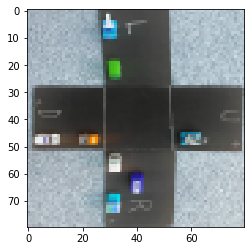

In [14]:
test_case = 3
plt.imshow(X_test[test_case])
print(np.round(y_pred[test_case]))

In [62]:
def create_dataset(img_folder):
   
    img_data_array=[]
   
    for file in os.listdir(os.path.join(img_folder)):

        image_path= os.path.join(img_folder,  file)
        image= cv2.imread(image_path, cv2.COLOR_BGR2RGB)
        image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
        image=np.array(image)
        image = image.astype('float32')
        image /= 242 
        #print(image.shape)
        #print(np.max(image))
        img_data_array.append(image)
    return img_data_array

In [56]:
img_data = create_dataset(test_folder)
X_test = np.array(img_data)
plt.imshow(X_test[0])
#print(np.round(y_pred[test_case]))

(80, 80, 3)
1.0


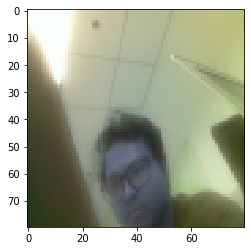

In [71]:
import time
def periodic_work(interval):
    while True:
        #change this to the function you want to call, or paste in the code you want to run
        img_data = create_dataset(test_folder)
        X_test = np.array(img_data)
        y_pred = best_model.predict(X_test)
        print(y_pred)
        #interval should be an integer, the number of seconds to wait
        time.sleep(interval)

In [72]:
periodic_work(5)

[[0.5765203  0.10994752 0.22020668 1.1712633 ]]
[[0.5765203  0.10994752 0.22020668 1.1712633 ]]
[[0.5765203  0.10994752 0.22020668 1.1712633 ]]
[[0.5765203  0.10994752 0.22020668 1.1712633 ]]
[[0.5765203  0.10994752 0.22020668 1.1712633 ]]
[[0.5765203  0.10994752 0.22020668 1.1712633 ]]
[[0.5765203  0.10994752 0.22020668 1.1712633 ]]
[[0.5765203  0.10994752 0.22020668 1.1712633 ]]


KeyboardInterrupt: 